In [105]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
40,103,13,1768.0,18962.0
2,105,75,5050.0,24320.0
30,110,20,15381.0,24349.0
4,112,58,62820.0,86710.0
61,114,6,577.0,22284.0
62,118,6,124.0,18182.0
50,122,10,607.0,21776.0
36,125,14,16280.0,23980.0
27,130,21,2129.0,18911.0
21,131,24,1726.0,19430.0


In [106]:
data2['user'].max()

'Ivana_10'

In [107]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
128,128,0.0,0.0,0.0
129,129,0.0,0.0,0.0
130,130,21.0,2129.0,18911.0
131,131,24.0,1726.0,19430.0
132,132,0.0,0.0,0.0


In [108]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,133.00000,133.000000,133.000000,133.000000
mean,66.00000,12.894737,2881.315789,11025.225564
std,38.53786,25.849290,7270.995146,12230.093213
min,0.00000,0.000000,0.000000,0.000000
25%,33.00000,0.000000,0.000000,0.000000
50%,66.00000,4.000000,124.000000,12221.000000
75%,99.00000,18.000000,1768.000000,19430.000000
max,132.00000,221.000000,62820.000000,86710.000000


In [109]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,24.0,5839.0,17697.0,1.621944,4.915833
1,1,28.0,6672.0,17831.0,1.853333,4.953056
2,2,23.0,2653.0,19147.0,0.736944,5.318611
3,3,27.0,9378.0,17451.0,2.605000,4.847500
4,4,42.0,16650.0,18734.0,4.625000,5.203889


In [110]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,24.0,5839.0,17697.0,1.621944,4.915833,32.994293
1,1,28.0,6672.0,17831.0,1.853333,4.953056,37.417980
2,2,23.0,2653.0,19147.0,0.736944,5.318611,13.855957
3,3,27.0,9378.0,17451.0,2.605000,4.847500,53.739041
4,4,42.0,16650.0,18734.0,4.625000,5.203889,88.875841
5,5,45.0,12847.0,20382.0,3.568611,5.661667,63.031106
6,6,4.0,98.0,16563.0,0.027222,4.600833,0.591680
7,7,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,8,6.0,410.0,18686.0,0.113889,5.190556,2.194156
9,9,221.0,15915.0,16418.0,4.420833,4.560556,96.936289


In [111]:
stream_stats['persenteg'].describe()

count    133.000000
mean      12.716068
std       24.287591
min        0.000000
25%        0.000000
50%        0.486277
75%        9.952991
max       96.936289
Name: persenteg, dtype: float64

In [112]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
66,66,0.0,0.0,0.0,0.0,0.0,0.0
91,91,0.0,0.0,0.0,0.0,0.0,0.0
89,89,0.0,0.0,0.0,0.0,0.0,0.0
86,86,0.0,0.0,0.0,0.0,0.0,0.0
85,85,0.0,0.0,0.0,0.0,0.0,0.0
83,83,0.0,0.0,0.0,0.0,0.0,0.0
82,82,0.0,0.0,0.0,0.0,0.0,0.0
81,81,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
78,78,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
stream_stats['watch_length_in_hour'].sum() /24

4.435358796296296

In [114]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
66,66,0.0,0.0,0.0,0.0,0.0,0.0
91,91,0.0,0.0,0.0,0.0,0.0,0.0
89,89,0.0,0.0,0.0,0.0,0.0,0.0
86,86,0.0,0.0,0.0,0.0,0.0,0.0
85,85,0.0,0.0,0.0,0.0,0.0,0.0
83,83,0.0,0.0,0.0,0.0,0.0,0.0
82,82,0.0,0.0,0.0,0.0,0.0,0.0
81,81,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
78,78,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
125,125,14.0,16280.0,23980.0,4.522222,6.661111,67.889908
112,112,58.0,62820.0,86710.0,17.450000,24.086111,72.448391
60,60,28.0,12804.0,17242.0,3.556667,4.789444,74.260527
62,62,31.0,9292.0,11766.0,2.581111,3.268333,78.973313
18,18,39.0,12799.0,15531.0,3.555278,4.314167,82.409375
26,26,63.0,30502.0,36105.0,8.472778,10.029167,84.481374
50,50,52.0,19384.0,22548.0,5.384444,6.263333,85.967713
4,4,42.0,16650.0,18734.0,4.625000,5.203889,88.875841
13,13,31.0,19549.0,21235.0,5.430278,5.898611,92.060278
9,9,221.0,15915.0,16418.0,4.420833,4.560556,96.936289


In [116]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
123,123,0.0,0.0,0.0,0.000000,0.000000,0.000000
124,124,0.0,0.0,0.0,0.000000,0.000000,0.000000
125,125,14.0,16280.0,23980.0,4.522222,6.661111,67.889908
126,126,0.0,0.0,0.0,0.000000,0.000000,0.000000
127,127,0.0,0.0,0.0,0.000000,0.000000,0.000000
128,128,0.0,0.0,0.0,0.000000,0.000000,0.000000
129,129,0.0,0.0,0.0,0.000000,0.000000,0.000000
130,130,21.0,2129.0,18911.0,0.591389,5.253056,11.257998
131,131,24.0,1726.0,19430.0,0.479444,5.397222,8.883170
132,132,0.0,0.0,0.0,0.000000,0.000000,0.000000


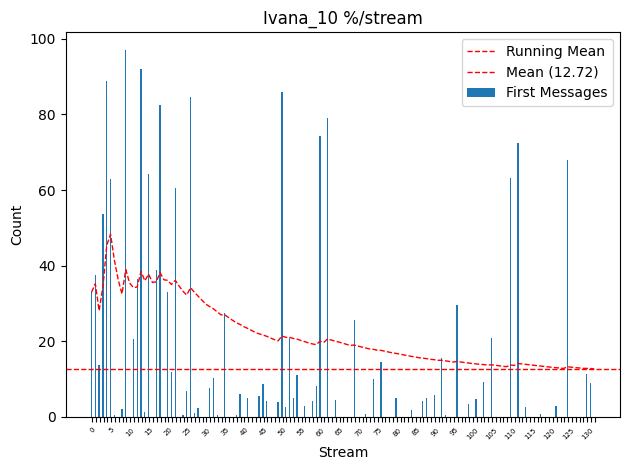

In [117]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()